In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("machinefale.csv", usecols=[2,3,4,5,6,7,8])
df = df.reindex(columns=['Machine failure', 'Type', 'Air temperature [K]', 'Process temperature [K]',
                  'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'])
# Type列をOne-hot-Encoding
df = pd.get_dummies(df,drop_first=True)
df

,Machine failure,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Type_L,Type_M
0,0,298.1,308.6,1551,42.8,0,0,1
1,0,298.2,308.7,1408,46.3,3,1,0
2,0,298.1,308.5,1498,49.4,5,1,0
3,0,298.2,308.6,1433,39.5,7,1,0
4,0,298.2,308.7,1408,40.0,9,1,0
...,...,...,...,...,...,...,...,...
9986,0,298.8,308.4,1604,29.5,14,0,1
9987,0,298.9,308.4,1632,31.8,17,0,0
9988,0,299.0,308.6,1645,33.4,22,0,1
9989,0,299.0,308.7,1408,48.5,25,0,0


<AxesSubplot:>

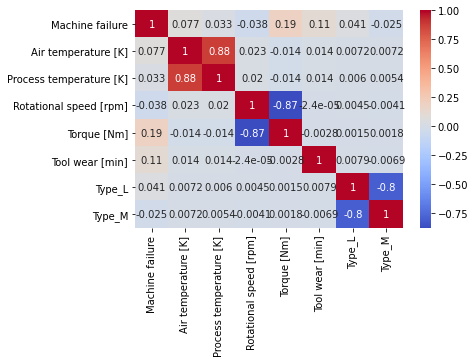

In [2]:
# 相関係数表示
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', annot=True)

In [3]:
# 「Process temperature [K]」列を削除
df.drop('Process temperature [K]', axis=1, inplace=True)
df

,Machine failure,Air temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Type_L,Type_M
0,0,298.1,1551,42.8,0,0,1
1,0,298.2,1408,46.3,3,1,0
2,0,298.1,1498,49.4,5,1,0
3,0,298.2,1433,39.5,7,1,0
4,0,298.2,1408,40.0,9,1,0
...,...,...,...,...,...,...,...
9986,0,298.8,1604,29.5,14,0,1
9987,0,298.9,1632,31.8,17,0,0
9988,0,299.0,1645,33.4,22,0,1
9989,0,299.0,1408,48.5,25,0,0


In [4]:
# 次元削減
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
df_pca = df.iloc[:,2:4]
df_pca = pca.fit_transform(df_pca)
df_pca = pd.DataFrame(df_pca,columns = ["pca"])
df_pca

,pca
0,12.007789
1,-130.993234
2,-41.250454
3,-105.692140
4,-130.686878
...,...
9986,65.591840
9987,93.446870
9988,106.353686
9989,-131.100216


In [5]:
# 元データに入れ替え
df_a = df.iloc[:,:2]
df_b = df.iloc[:,4:]
df = pd.concat([df_a,df_pca,df_b], axis=1)
df

,Machine failure,Air temperature [K],pca,Tool wear [min],Type_L,Type_M
0,0,298.1,12.007789,0,0,1
1,0,298.2,-130.993234,3,1,0
2,0,298.1,-41.250454,5,1,0
3,0,298.2,-105.692140,7,1,0
4,0,298.2,-130.686878,9,1,0
...,...,...,...,...,...,...
9986,0,298.8,65.591840,14,0,1
9987,0,298.9,93.446870,17,0,0
9988,0,299.0,106.353686,22,0,1
9989,0,299.0,-131.100216,25,0,0


c:\users\hiroa\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='pca', ylabel='Density'>

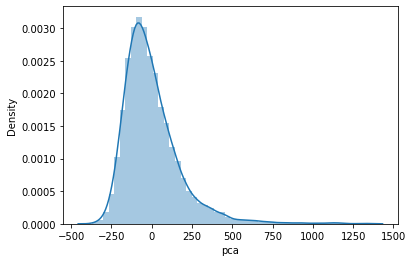

In [6]:
sns.distplot(df['pca'], kde=True)

In [7]:
# 正規分布の列に標準化を適用
from sklearn import preprocessing
df['Air temperature [K]']=preprocessing.scale(df['Air temperature [K]'])
df['pca']=preprocessing.scale(df['pca'])
df

,Machine failure,Air temperature [K],pca,Tool wear [min],Type_L,Type_M
0,0,-0.952222,0.066899,0,0,1
1,0,-0.902227,-0.729806,3,1,0
2,0,-0.952222,-0.229820,5,1,0
3,0,-0.902227,-0.588845,7,1,0
4,0,-0.902227,-0.728099,9,1,0
...,...,...,...,...,...,...
9986,0,-0.602257,0.365433,14,0,1
9987,0,-0.552262,0.520623,17,0,0
9988,0,-0.502267,0.592531,22,0,1
9989,0,-0.502267,-0.730402,25,0,0


## 機械学習を実行しよう

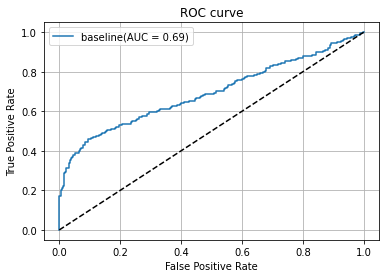

In [8]:
# 正常値のみの学習データ、正常値、異常値を合わせたテストデータを用意
# 正常値のトレーニングデータ、テストデータ
normal = df[df["Machine failure"] != 1]
x_normal = normal.iloc[:,1:]
y_normal = normal.iloc[:,0]

p = 300
x_test_normal = x_normal.iloc[:p, :]
y_test_normal = y_normal.iloc[:p]
x_train_normal = x_normal.iloc[p:, :]

# 異常値のテストデータ
outliers = df[df["Machine failure"] != 0]
x_test_outliers = outliers.iloc[:,1:]
y_outliers = outliers.iloc[:,0]

# 正常値、異常値を合わせたテストデータ
x_test = pd.concat([x_test_normal, x_test_outliers])

# テストデータのラベルリスト
y_test = pd.concat([y_test_normal, y_outliers])

# 学習
from sklearn import svm
from sklearn.svm import OneClassSVM
# fit the model
clf = OneClassSVM(nu=0.01, kernel='linear', gamma=0.1)
# kernel種類：'linear'、 'poly'、 'rbf'、 'sigmoid'
clf.fit(x_train_normal)

y_pred = clf.predict(x_test)

# 可視化
from sklearn import svm
y_score = clf.decision_function(x_test)
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test,y_score)

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_score)

plt.plot(fpr, tpr, label='baseline(AUC = %.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()

# 予測が外れているデータを確認しよう

In [9]:
# 予測値の値を元データに合わせる
y_pred = pd.DataFrame(y_pred,columns = ["pred"])
y_pred = y_pred.replace(1, 0)
y_pred = y_pred.replace(-1, 1)

# テストデータとデータを結合する
x_test = x_test.reset_index()
y_test = y_test.reset_index()
y_concat = pd.concat([x_test,y_test, y_pred], axis=1)
y_concat

,index,Air temperature [K],pca,Tool wear [min],Type_L,Type_M,index,Machine failure,pred
0,0,-0.952222,0.066899,0,0,1,0,0,1
1,1,-0.902227,-0.729806,3,1,0,1,0,0
2,2,-0.952222,-0.229820,5,1,0,2,0,0
3,3,-0.902227,-0.588845,7,1,0,3,0,0
4,4,-0.902227,-0.728099,9,1,0,4,0,0
...,...,...,...,...,...,...,...,...,...
613,9749,-0.702247,4.080713,218,1,0,9749,1,0
614,9755,-0.752242,-1.369712,12,1,0,9755,1,0
615,9813,-0.752242,-1.000868,187,1,0,9813,1,0
616,9821,-0.852232,-1.127557,206,1,0,9821,1,0


In [10]:
# 予測が外れている行を抽出
y_concat = y_concat[y_concat["pred"] != y_concat['Machine failure']]
y_concat

,index,Air temperature [K],pca,Tool wear [min],Type_L,Type_M,index,Machine failure,pred
0,0,-0.952222,0.066899,0,0,1,0,0,1
75,78,-0.602257,-0.786862,0,1,0,78,0,1
157,162,-0.852232,0.263643,0,1,0,162,0,1
239,250,-1.002217,0.687321,0,1,0,250,0,1
300,50,-0.552262,7.367047,143,1,0,50,1,0
...,...,...,...,...,...,...,...,...,...
613,9749,-0.702247,4.080713,218,1,0,9749,1,0
614,9755,-0.752242,-1.369712,12,1,0,9755,1,0
615,9813,-0.752242,-1.000868,187,1,0,9813,1,0
616,9821,-0.852232,-1.127557,206,1,0,9821,1,0


array([[<AxesSubplot:title={'center':'Air temperature [K]'}>,
        <AxesSubplot:title={'center':'pca'}>],
       [<AxesSubplot:title={'center':'Tool wear [min]'}>,
        <AxesSubplot:title={'center':'Type_L'}>],
       [<AxesSubplot:title={'center':'Type_M'}>,
        <AxesSubplot:title={'center':'Machine failure'}>]], dtype=object)

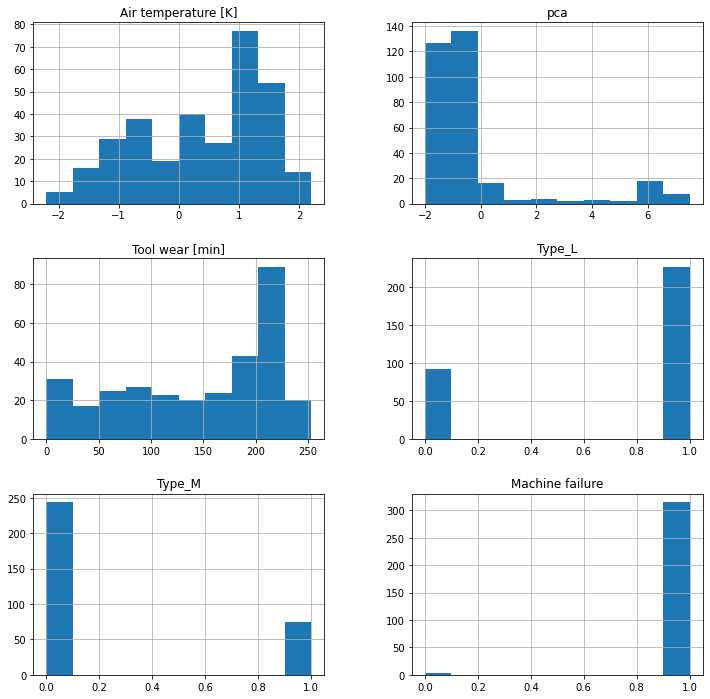

In [11]:
# ヒストグラム表示
col = ['Air temperature [K]','pca','Tool wear [min]','Type_L','Type_M','Machine failure']
y_concat[col].hist(figsize= (12,12))

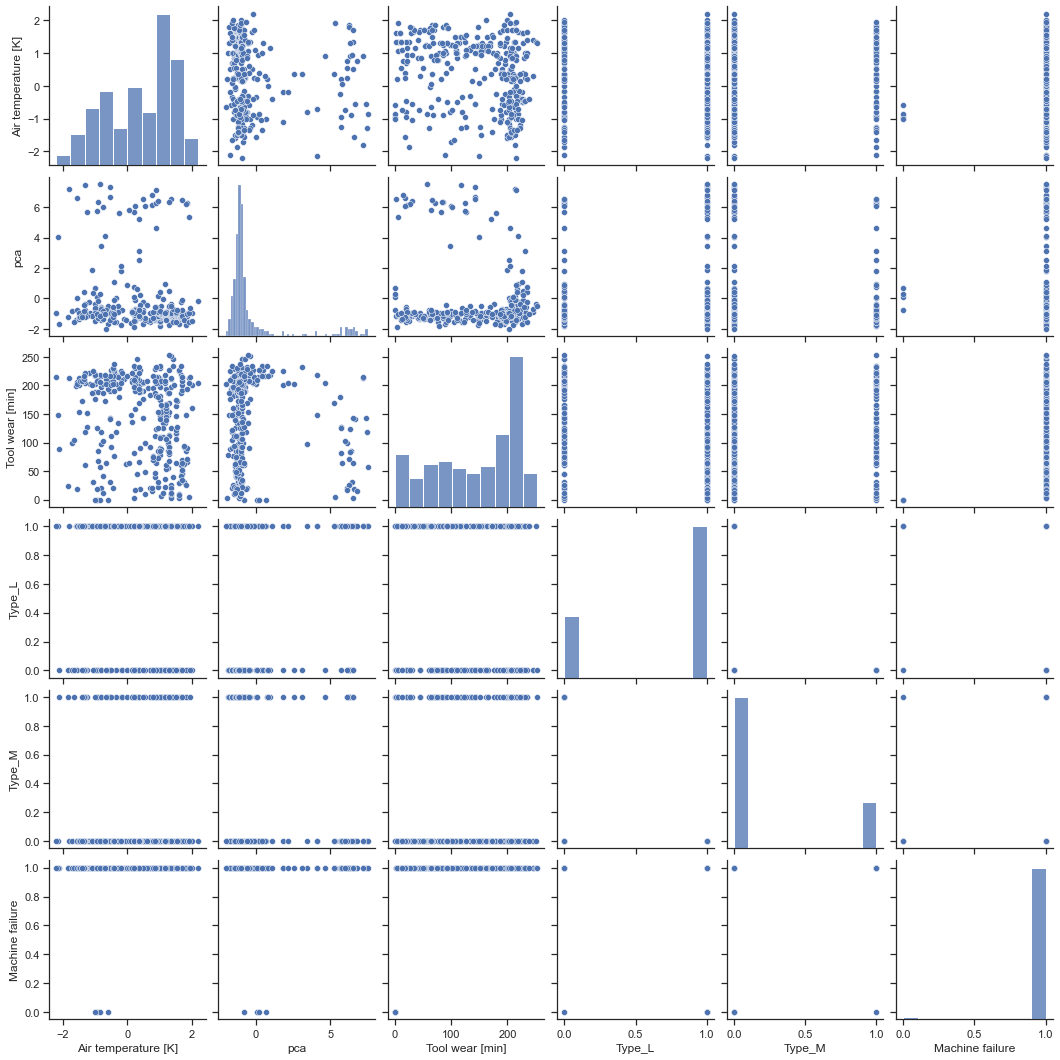

In [12]:
# ヒストグラム、散布図一括表示
sns.set(style="ticks", color_codes=True)
sns.pairplot(y_concat[col])
plt.show()